In [1]:
#The aim of this analysis is to determine which region is the most attractive if I want to choose a place to live.
#We will determine the dynamism of different sectors based on the evolution of their electrical consumption

#Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#Importing the data from the csv file
df = pd.read_csv("consommation-electrique-par-secteur-dactivite-commune.csv", delimiter =";")
df.head()

#Renaming the columns to avoid special character problems
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.replace("'", '_') for c in df.columns]
df.columns = [c.replace('(', '') for c in df.columns]
df.columns = [c.replace(')', '') for c in df.columns]
df.columns = [c.replace('é', 'e') for c in df.columns]

#Setting the number of columns displayed 

pd.set_option("display.max_columns",50)


df.head()


,Annee,Nom_commune,Code_commune,Nom_EPCI,Code_EPCI,Type_EPCI,Nom_departement,Code_departement,Nom_region,Code_region,Nb_sites_Residentiel,Conso_totale_Residentiel_MWh,Conso_moyenne_Residentiel_MWh,Nb_sites_Professionnel,Conso_totale_Professionnel_MWh,Conso_moyenne_Professionnel_MWh,Nb_sites_Agriculture,Conso_totale_Agriculture_MWh,Nb_sites_Industrie,Conso_totale_Industrie_MWh,Nb_sites_Tertiaire,Conso_totale_Tertiaire_MWh,Nb_sites_Secteur_non_affecte,Conso_totale_Secteur_non_affecte_MWh,Nombre_d_habitants,Taux_de_logements_collectifs,Taux_de_residences_principales,Superficie_des_logements_<_30_m2,Superficie_des_logements_30_à_40_m2,Superficie_des_logements_40_à_60_m2,Superficie_des_logements_60_à_80_m2,Superficie_des_logements_80_à_100_m2,Superficie_des_logements_>_100_m2,Residences_principales_avant_1919,Residences_principales_de_1919_à_1945,Residences_principales_de_1946_à_1970,Residences_principales_de_1971_à_1990,Residences_principales_de_1991_à_2005,Residences_principales_de_2006_à_2010,Residences_principales_après_2011,Taux_de_chauffage_electrique,Geo_Shape,Geo_Point_2D
0,2011,La Chapelle-Saint-Maurice,74060,CC de la Rive Gauche du Lac d'Annecy,247400732,CC,Haute-Savoie,74,Auvergne-Rhône-Alpes,84,63.0,388.407654,6.165201,17.0,123.886227,7.287425,0,0.0,0,0.000000,1,33.605294,0,0.0,134,28.955467,87.226330,1.818182,1.818182,9.090909,38.181818,23.636364,25.454545,36.363636,5.454545,7.272727,21.818182,12.727273,10.909091,5.454545,36.363636,NaN,NaN
1,2015,Thaumiers,18261,CC le Dunois,241800424,CC,Cher,18,Centre-Val de Loire,24,257.0,1644.113231,6.397328,34.0,232.732521,6.845074,0,0.0,1,9.031000,0,0.000000,0,0.0,414,0.749064,75.107296,0.000000,1.714286,7.428571,23.428571,26.285714,41.142857,65.142857,12.571429,4.571429,7.428571,2.285714,6.285714,1.714286,17.714286,NaN,NaN
2,2013,Neuville-sur-Saône,69143,CU de Lyon,246900245,CU,Rhône,69,Auvergne-Rhône-Alpes,84,3602.0,13663.962722,3.793438,750.0,6758.088071,9.010784,0,0.0,16,36270.708649,42,9052.230987,0,0.0,7242,72.548244,99.786579,4.208236,5.383414,18.980476,31.729883,21.571045,18.126951,12.693790,6.374103,24.723784,35.053170,12.476466,8.678691,0.000000,17.437240,NaN,NaN
3,2011,Lachapelle-sous-Rougemont,90058,CC du Pays Sous Vosgien,249000217,CC,Territoire-de-Belfort,90,Bourgogne-Franche-Comté,27,271.0,1523.843323,5.623038,46.0,469.457076,10.205589,0,0.0,2,2138.948712,1,103.714138,0,0.0,597,36.191962,98.377403,1.652911,3.305781,15.289254,11.570255,25.206599,42.975199,37.190072,6.611563,9.504127,12.809908,19.008253,13.636384,1.239693,28.512380,NaN,NaN
4,2016,Seyre,31546,CC Coteaux du Lauragais Sud (Co.Laur.Sud),243100179,CC,Haute-Garonne,31,Occitanie,76,53.0,438.788782,8.279034,11.0,22.572683,2.052062,0,0.0,0,0.000000,0,0.000000,0,0.0,108,1.879739,91.391091,0.000000,0.000000,2.127638,10.638190,12.766082,74.468091,23.404272,2.127638,12.766082,17.021358,14.893720,6.382914,23.404017,34.042461,"{""type"": ""Polygon"", ""coordinates"": [[[1.678708...","43.3635974739, 1.66366858427"


In [2]:
#Calculation of the evolution of principal redicences:

df['Total_residences_toute_annee'] = df['Residences_principales_avant_1919'] + df['Residences_principales_de_1919_à_1945'] + df['Residences_principales_de_1946_à_1970'] + df['Residences_principales_de_1971_à_1990'] + df['Residences_principales_de_1971_à_1990'] + df['Residences_principales_de_1991_à_2005'] + df['Residences_principales_de_2006_à_2010'] + df['Residences_principales_après_2011']
df['Taux_residence_annee_apres_2011'] = (df['Residences_principales_après_2011'])/(df['Total_residences_toute_annee'])
pd.set_option("display.max_rows",50)
df[['Annee','Nom_commune','Code_commune','Taux_residence_annee_apres_2011','Total_residences_toute_annee']].head()


#index_max_value = df_electricity['Taux_residence_annee_apres_2011'].idxmax()

#print(df_electricity.iloc[index_max_value])

,Annee,Nom_commune,Code_commune,Taux_residence_annee_apres_2011,Total_residences_toute_annee
0,2011,La Chapelle-Saint-Maurice,74060,0.044776,121.818182
1,2015,Thaumiers,18261,0.015957,107.428571
2,2013,Neuville-sur-Saône,69143,0.000000,135.053173
3,2011,Lachapelle-sous-Rougemont,90058,0.010989,112.809908
4,2016,Seyre,31546,0.199998,117.021358


In [3]:
#Calculating the comsumption per habitant
df['Conso_par_habitant_KWh'] = (df['Conso_totale_Residentiel_MWh']/df['Nombre_d_habitants'])*1000

df[['Nom_commune','Conso_par_habitant_KWh']]


,Nom_commune,Conso_par_habitant_KWh
0,La Chapelle-Saint-Maurice,2898.564579
1,Thaumiers,3971.287999
2,Neuville-sur-Saône,1886.766463
3,Lachapelle-sous-Rougemont,2552.501378
4,Seyre,4062.859095
5,Bourdeaux,3342.756530
6,Bonnée,3335.575334
7,Étreval,NaN
8,Aulnoy,4071.607883
9,Causse-et-Diège,2951.699548


In [4]:
#Calculating the evolution of the comsumption per habitant
df_2011 = df.query("Annee == 2011").rename(columns={'Conso_par_habitant_KWh':"Conso_par_hab_2011"})[['Nom_region','Nom_departement','Nom_commune','Code_commune','Conso_par_hab_2011']]
df_2016 = df.query("Annee == 2016").rename(columns={'Conso_par_habitant_KWh':"Conso_par_hab_2016"})[['Code_commune','Conso_par_hab_2016']]

#For this proccess we are doing an INNER JOIN to have data of diffrent years on the same line
df_evol_conso = pd.merge(df_2011,df_2016,how='inner',on='Code_commune')

df_evol_conso[['Nom_commune','Conso_par_hab_2011','Conso_par_hab_2016']]


,Nom_commune,Conso_par_hab_2011,Conso_par_hab_2016
0,La Chapelle-Saint-Maurice,2898.564579,2841.007619
1,Lachapelle-sous-Rougemont,2552.501378,3011.360811
2,Kirsch-lès-Sierck,3703.820388,4050.479911
3,Larzac,NaN,NaN
4,Saint-Léger-en-Yvelines,4138.511879,4601.523578
5,Sainte-Marie,2500.566921,2691.012207
6,Roussac,3049.883047,3231.874333
7,Pronville,2335.834782,2546.929101
8,Genouilly,3997.559434,4023.157091
9,Berhet,2606.966686,2867.459521


In [5]:
# Calculating the evolution of the consumption per habitant ofr each town
df_evol_conso['Evolution_conso_%']= (df_evol_conso['Conso_par_hab_2016']-df_evol_conso['Conso_par_hab_2011'])/(df_evol_conso['Conso_par_hab_2011']/100)
df_evol_conso[['Nom_commune','Evolution_conso_%']] 

,Nom_commune,Evolution_conso_%
0,La Chapelle-Saint-Maurice,-1.985706
1,Lachapelle-sous-Rougemont,17.976853
2,Kirsch-lès-Sierck,9.359512
3,Larzac,NaN
4,Saint-Léger-en-Yvelines,11.187879
5,Sainte-Marie,7.616084
6,Roussac,5.967156
7,Pronville,9.037211
8,Genouilly,0.640332
9,Berhet,9.992181


In [6]:
# We now want to get the city where this evolution is negative and the littlest
#df_evol_conso[['Nom_commune','Evolution_conso_%']].min()

index_min_value = df_evol_conso['Evolution_conso_%'].idxmin()

print(df_evol_conso.iloc[index_min_value])

Nom_region             Occitanie
Nom_departement              Lot
Nom_commune           Beauregard
Code_commune               46020
Conso_par_hab_2011       3452.43
Conso_par_hab_2016       1026.55
Evolution_conso_%       -70.2659
Name: 27847, dtype: object


In [7]:
#Grouping the data by Nom_region in a new dataframe
df_Region = df_evol_conso.groupby('Nom_region').mean()

df_Region.head()




,Code_commune,Conso_par_hab_2011,Conso_par_hab_2016,Evolution_conso_%
Nom_region,,,,
Auvergne-Rhône-Alpes,36785.647835,2912.705103,3275.275915,11.660654
Bourgogne-Franche-Comté,51161.211047,2805.139240,3086.284691,10.238948
Bretagne,34368.980754,2769.028859,3134.313004,12.571520
Centre-Val de Loire,33926.229179,3245.645956,3557.758538,9.083030
Grand-Est,50901.033876,2750.244140,2992.161998,8.548681


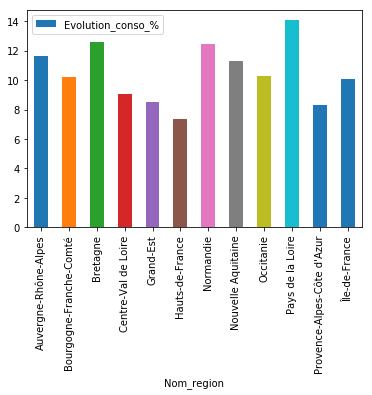

In [8]:
#graph of consumption evolution per Region
df_Region.plot(kind = 'bar', y = 'Evolution_conso_%')


In [10]:
pd.set_option("display.max_columns",50)
import xml.etree.cElementTree as et

path = "feed.xml"
file = open(path, encoding="utf8")

def getvalueofnode(node):
    """ return node text or None """
    return node.text if node is not None else None


parsedXML = et.parse(file)
dfcols = [ 'guid', 'link', 'name', 'title', 'description', 'pubDate', 'updated', 'location' ]
root= parsedXML.getroot()
channel = root.find('channel')
df_xml = pd.DataFrame(columns=dfcols)
for node in channel.findall('item'):
    category = node.findall('category')
    namespaces = {'a10': 'http://www.w3.org/2005/Atom'}
    namespaces2 = {'a2': 'http://stackoverflow.com/jobs/'}
    guid = node.find('guid')
    link = node.find('link')
    name = node.find('a10:author/a10:name', namespaces)
    title = node.find('title')
    description = node.find('description')
    pubDate = node.find('pubDate')
    updated = node.find('a10:updated', namespaces)
    location = node.find('{http://stackoverflow.com/jobs/}location')
    df_xml = df_xml.append(pd.Series([ getvalueofnode(guid), getvalueofnode(link), getvalueofnode(name), getvalueofnode(title), getvalueofnode(description), getvalueofnode(pubDate), getvalueofnode(updated), getvalueofnode(location)], index=dfcols), ignore_index=True)

#We display the job's locations
df_xml['location']


0         Karlsruhe, Deutschland
1         Karlsruhe, Deutschland
2         Karlsruhe, Deutschland
3                  Paris, France
4        Düsseldorf, Deutschland
5                    Bristol, UK
6                Berlin, Germany
7                  Nacka, Sweden
8                  Kyiv, Ukraine
9             Karlsruhe, Germany
10     Ho Chi Minh City, Vietnam
11             Marseille, France
12                   Bristol, UK
13                Espoo, Finland
14                Espoo, Finland
15                Espoo, Finland
16              Graz, Österreich
17              Graz, Österreich
18              Graz, Österreich
19     Herzogenrath, Deutschland
20          Utrecht, Netherlands
21              Lahore, Pakistan
22           Zürich, Switzerland
23           Sursee, Switzerland
24           Coburg, Deutschland
                 ...            
975                  Atlanta, GA
976            Sydney, Australia
977         Melbourne, Australia
978            Sydney, Australia
979       

In [14]:
import re

#We only take jobs from France

df_xml_France = df_xml[df_xml['location'].astype(str).str.contains('(.+), France')]

D:\Pascal Akouri\Programmes\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


In [15]:
#We create a new column with only the City name by slicing the ", France" suffix
df_xml_France['Nom_commune']= df_xml_France['location'].str.split(',').str[0]


df_choix_commune = pd.merge(df_evol_conso,df_xml_France,how='inner',on='Nom_commune')
df_choix_commune

D:\Pascal Akouri\Programmes\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Nom_region,Nom_departement,Nom_commune,Code_commune,Conso_par_hab_2011,Conso_par_hab_2016,Evolution_conso_%,guid,link,name,title,description,pubDate,updated,location
0,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,Marseille,13055,NaN,inf,NaN,147514,https://stackoverflow.com/jobs/147514/d%C3%A9v...,WYPLAY,Développeur Back End (Web et DevOps) at WYPLAY...,<p>Jeune entreprise cr&eacute;&eacute;e en Mar...,"Tue, 27 Mar 2018 08:41:14 Z",2018-03-27T08:41:14Z,"Marseille, France"
1,Auvergne-Rhône-Alpes,Rhône,Lyon,69123,NaN,NaN,NaN,171820,https://stackoverflow.com/jobs/171820/product-...,Antidot,"Product Owner expérimenté (logiciel Cloud, cli...",<p>Au sein de l'&eacute;quipe en charge de la ...,"Fri, 23 Mar 2018 15:26:34 Z",2018-03-23T15:26:34Z,"Lyon, France"
2,Auvergne-Rhône-Alpes,Rhône,Lyon,69123,NaN,NaN,NaN,142846,https://stackoverflow.com/jobs/142846/consulta...,Antidot,Consultant (Lyon) - SaaS solutions provider at...,<p>You are a versatile software engineer willi...,"Fri, 23 Mar 2018 11:03:34 Z",2018-03-23T11:03:34Z,"Lyon, France"
3,Hauts-de-France,Nord,Villeneuve-d'Ascq,59009,1596.675110,NaN,NaN,171025,https://stackoverflow.com/jobs/171025/d%C3%A9v...,DECATHLON,Développeur SAP ABAP/FIORI H/F at DECATHLON (V...,<p>Tu aimes le concret ? le travail en &eacute...,"Fri, 16 Mar 2018 08:20:19 Z",2018-03-16T08:20:19Z,"Villeneuve-d'Ascq, France"
4,Île-de-France,Essonne,Nozay,91458,2201.135051,2304.620394,4.701454,170992,https://stackoverflow.com/jobs/170992/architec...,NOKIA,Architecte logiciel plateforme et transport BT...,<p>En qualit&eacute; d&rsquo;ing&eacute;nieur ...,"Wed, 21 Mar 2018 16:01:18 Z",2018-03-21T16:01:18Z,"Nozay, France"
5,Grand-Est,Aube,Nozay,10269,2425.148043,3012.561828,24.221770,170992,https://stackoverflow.com/jobs/170992/architec...,NOKIA,Architecte logiciel plateforme et transport BT...,<p>En qualit&eacute; d&rsquo;ing&eacute;nieur ...,"Wed, 21 Mar 2018 16:01:18 Z",2018-03-21T16:01:18Z,"Nozay, France"
6,Pays de la Loire,Loire-Atlantique,Nozay,44113,2499.902271,2751.247830,10.054215,170992,https://stackoverflow.com/jobs/170992/architec...,NOKIA,Architecte logiciel plateforme et transport BT...,<p>En qualit&eacute; d&rsquo;ing&eacute;nieur ...,"Wed, 21 Mar 2018 16:01:18 Z",2018-03-21T16:01:18Z,"Nozay, France"
7,Île-de-France,Paris,Paris,75056,inf,inf,NaN,172077,https://stackoverflow.com/jobs/172077/junior-t...,Marin Software,Junior Testing Engineer at Marin Software (Par...,<p><strong>Marin Software has taken our Qualit...,"Tue, 27 Mar 2018 09:06:32 Z",2018-03-27T09:06:32Z,"Paris, France"
8,Île-de-France,Paris,Paris,75056,inf,inf,NaN,132571,https://stackoverflow.com/jobs/132571/stagiair...,European Digital Reading Lab (EDRLab),"Stagiaire école informatique, Android/Kotlin, ...",<p>Nous sommes en train d'architecturer et d&e...,"Fri, 23 Mar 2018 12:53:35 Z",2018-03-23T12:53:35Z,"Paris, France"
9,Île-de-France,Paris,Paris,75056,inf,inf,NaN,171667,https://stackoverflow.com/jobs/171667/d%C3%A9v...,CACD2 - La manufacture digitale,Développeurs Mobile et Web pour accélérer la d...,<p>Nous savons ce que vous pensez : la banque ...,"Thu, 22 Mar 2018 13:43:31 Z",2018-03-22T13:43:31Z,"Paris, France"


In [16]:
index_min_value_1 = df_choix_commune['Evolution_conso_%'].idxmin()

print(df_choix_commune.iloc[index_min_value_1])

Nom_region                                                Île-de-France
Nom_departement                                                 Essonne
Nom_commune                                                       Nozay
Code_commune                                                      91458
Conso_par_hab_2011                                              2201.14
Conso_par_hab_2016                                              2304.62
Evolution_conso_%                                               4.70145
guid                                                             170992
link                  https://stackoverflow.com/jobs/170992/architec...
name                                                              NOKIA
title                 Architecte logiciel plateforme et transport BT...
description           <p>En qualit&eacute; d&rsquo;ing&eacute;nieur ...
pubDate                                     Wed, 21 Mar 2018 16:01:18 Z
updated                                            2018-03-21T16

In [ ]:
#The town with the lowest consumption evolution and in which
#we can find a job is Nozay in Essonne
#We will choose this city and this job in NOKIA company.